In [1]:
%load_ext autoreload
%autoreload 2

import timit_utils as tu
import timit_utils.audio_utils as au
import timit_utils.drawing_utils as du
%matplotlib inline

# Corpus: 
Load the TIMIT database into a Corpus. All it does is contain two sub-corpuses, for train and test sets.

In [2]:
corpus = tu.Corpus('../TIMIT')
train = corpus.train
corpus.train, corpus.test

(<timit_utils.core.SubCorpus at 0x1135747b8>,
 <timit_utils.core.SubCorpus at 0x113574ba8>)

... basically, that's it. Everything below is convenient ways to load audio and transcription data.

# Display sentence audio, word, and phoneme transcriptions

Sentence SA1, sample rate: 16000


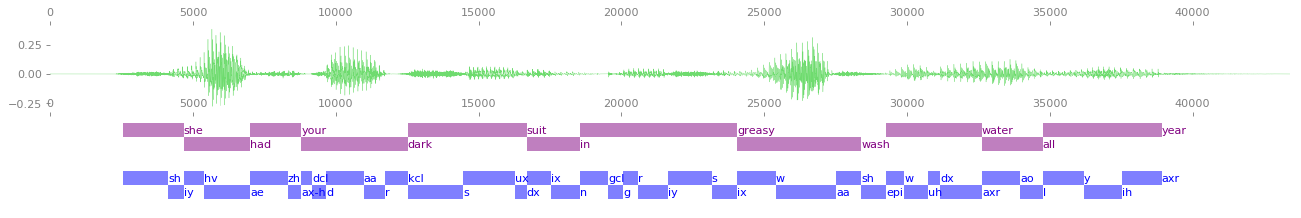

In [3]:
sentence = train.sentences_by_phone_df('aa').sentence[0]
print(f'Sentence {sentence.name}, sample rate: {sentence.sample_rate}')
du.DrawVerticalPanels([du.AudioPanel(sentence.raw_audio, show_x_axis=True), 
                       du.WordsPanel(sentence.words_df, sentence.raw_audio.shape[0], show_x_axis=True),
                       du.PhonesPanel(sentence.phones_df, sentence.raw_audio.shape[0])
                      ])

# SubCorpus
Examine the train SubCorpus in various ways:

## Get a dataframe containing word counts spoken by all people.

In [4]:
train.words_to_usages_df.head(3)

,'em,a,abbreviate,abides,ability,able,ably,abolish,aborigine,aborigines,...,zebras,zig,zinnias,zippers,zircons,zombie,zones,zoo,zoologist,zoos
ABC0 (M),0,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ADC0 (M),0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADD0 (M),0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


... user ABC0, a Male, spoke the word 'a' twice...

## Get a dataframe containing phoneme counts spoken by all people.

In [5]:
train.phones_to_usages_df.head(3)

,aa,ae,ah,ao,aw,ax,ax-h,axr,ay,b,...,tcl,th,uh,uw,ux,v,w,y,z,zh
ABC0 (M),8,12,3,4,1,1,2,10,1,6,...,10,1,2,0,7,7,5,4,12,1
ADC0 (M),6,11,6,7,1,6,1,1,7,7,...,13,1,1,0,6,6,6,4,8,0
ADD0 (M),7,11,3,8,2,2,1,2,5,7,...,18,1,0,2,8,4,8,5,6,0


## Given any word, get a dataframe containing all the people who have said that word, the corresponding sentences, and counts within that sentence.

In [6]:
train.sentences_by_word_df('a').head(3)

,sentence,count
ABC0 (M),SX241,1
ABC0 (M),SX61,1
ADC0 (M),SI737,1


## Same for phonemes

In [7]:
train.sentences_by_phone_df('aa').head(6)

,sentence,count
ABC0 (M),SA1,2
ABC0 (M),SI1620,1
ABC0 (M),SI2041,1
ABC0 (M),SI781,1
ABC0 (M),SX331,1
ABC0 (M),SX421,1


## Values in these dataframes tend to be objects:

### For instance, index contains Person:

In [8]:
train.phones_to_usages_df.index[3]

### Sentences are objects as well:

In [9]:
train.sentences_by_phone_df('aa').sentence[0]

# Region

In [10]:
train.regions

{'DR1': <timit_utils.core.Region at 0x1135749b0>,
 'DR2': <timit_utils.core.Region at 0x113574a20>,
 'DR3': <timit_utils.core.Region at 0x113574a58>,
 'DR4': <timit_utils.core.Region at 0x113574a90>,
 'DR5': <timit_utils.core.Region at 0x113574ac8>,
 'DR6': <timit_utils.core.Region at 0x113574b00>,
 'DR7': <timit_utils.core.Region at 0x113574b38>,
 'DR8': <timit_utils.core.Region at 0x113574b70>}

In [11]:
r0 = train.region_by_index(0)
r0

In [12]:
r0.phones_to_usages_df.head(3)

,aa,ae,ah,ao,aw,ax,ax-h,axr,ay,b,...,tcl,th,uh,uw,ux,v,w,y,z,zh
CJF0 (F),4,6,7,4,2,5,2,6,3,5,...,12,1,2,1,1,4,9,1,4,0
CPM0 (M),6,10,4,7,1,5,5,4,8,5,...,18,1,0,1,5,6,7,5,11,1
DAC0 (M),6,6,5,4,2,5,5,9,5,6,...,10,1,1,0,2,5,6,2,17,0


# Person

## You can get Person from Region or SubCorpus:

In [13]:
p0 = train.person_by_index(0) 
p0, p0.name

(<timit_utils.core.Person at 0x1135ac1d0>, 'ABC0')

In [14]:
rp0 = train.region_by_index(0).person_by_index(0)
rp0, rp0.name

(<timit_utils.core.Person at 0x11358a240>, 'CJF0')

# Sentence

## You can get Sentences from Person, or Region or SubCorpus DataFrames

In [15]:
p0.sentences

{'SA1': <timit_utils.core.Sentence at 0x1155682b0>,
 'SA2': <timit_utils.core.Sentence at 0x115568550>,
 'SI1620': <timit_utils.core.Sentence at 0x115568e80>,
 'SI2041': <timit_utils.core.Sentence at 0x115568ef0>,
 'SI781': <timit_utils.core.Sentence at 0x115568ac8>,
 'SX151': <timit_utils.core.Sentence at 0x1155680f0>,
 'SX241': <timit_utils.core.Sentence at 0x115568518>,
 'SX331': <timit_utils.core.Sentence at 0x115568f98>,
 'SX421': <timit_utils.core.Sentence at 0x115568cc0>,
 'SX61': <timit_utils.core.Sentence at 0x1155687b8>}

In [16]:
s0 = p0.sentence_by_index(0)
s0, s0.name

(<timit_utils.core.Sentence at 0x1155682b0>, 'SA1')

In [17]:
s0 = train.sentences_by_phone_df('aa').sentence[0]
s0, s0.name

(<timit_utils.core.Sentence at 0x1155682b0>, 'SA1')

## Sentences contain raw audio:

In [18]:
s0.raw_audio

array([ 0.00036621,  0.00015259,  0.        , ..., -0.00021362,
       -0.00042725, -0.00012207])

In [19]:
s0.sample_rate

16000

## We can get dataframes that contain transcriptions of words and phonemes:

In [20]:
s0.words_df.head(5)

,start,end
she,2560,4678
had,4678,7000
your,7000,8791
dark,8791,12519
suit,12519,16680


In [21]:
s0.phones_df.head(5)

,start,end
sh,2560,4130
iy,4130,4678
hv,4678,5389
ae,5389,7000
zh,7000,8313


## And Counters thereof...

In [22]:
s0.word_counts

Counter({'all': 1,
         'dark': 1,
         'greasy': 1,
         'had': 1,
         'in': 1,
         'she': 1,
         'suit': 1,
         'wash': 1,
         'water': 1,
         'year': 1,
         'your': 1})

In [23]:
s0.phone_counts

Counter({'aa': 2,
         'ae': 1,
         'ao': 1,
         'ax-h': 1,
         'axr': 2,
         'd': 1,
         'dcl': 1,
         'dx': 2,
         'epi': 1,
         'g': 1,
         'gcl': 1,
         'hv': 1,
         'ih': 1,
         'ix': 2,
         'iy': 2,
         'kcl': 1,
         'l': 1,
         'n': 1,
         'r': 2,
         's': 2,
         'sh': 2,
         'uh': 1,
         'ux': 1,
         'w': 2,
         'y': 1,
         'zh': 1})

In [24]:
features = au.audio_features(s0.raw_audio, s0.sample_rate)
features.shape

(2690, 66)

# Audio feature extraction

## Turn it into features of all sorts: [mel energies + mel filterbank + log mel filterbank + mfcc signal]

In [25]:
gained_padded_audio = au.audio_gained(au.audio_zero_padded(8000, s0.raw_audio, 8000), 1.0)
audio_features = au.audio_features(gained_padded_audio, s0.sample_rate)
sampled_audio = au.resampled_audio(s0.raw_audio, 
                       sample_rate = s0.sample_rate, 
                       pad = 8000, 
                       to_sample_rate = 1000)
print(gained_padded_audio.shape, sampled_audio.shape, audio_features.shape)

(59418,) (3708,) (3690, 66)


## Get down-sampled words and phoneme sequences

In [26]:
sentence_phones_input = au.resampled_phones_df(s0.phones_df, s0.sample_rate, left_pad=8000)
sentence_words_input = au.resampled_phones_df(s0.words_df, s0.sample_rate, left_pad=8000)

## Draw everything
* Raw audio
* Raw word transcriptions
* Raw phoneme transcriptions
* Downsampled audio
* Downsampled word transcriptions
* Downsampled phoneme transcriptions
* Mel features

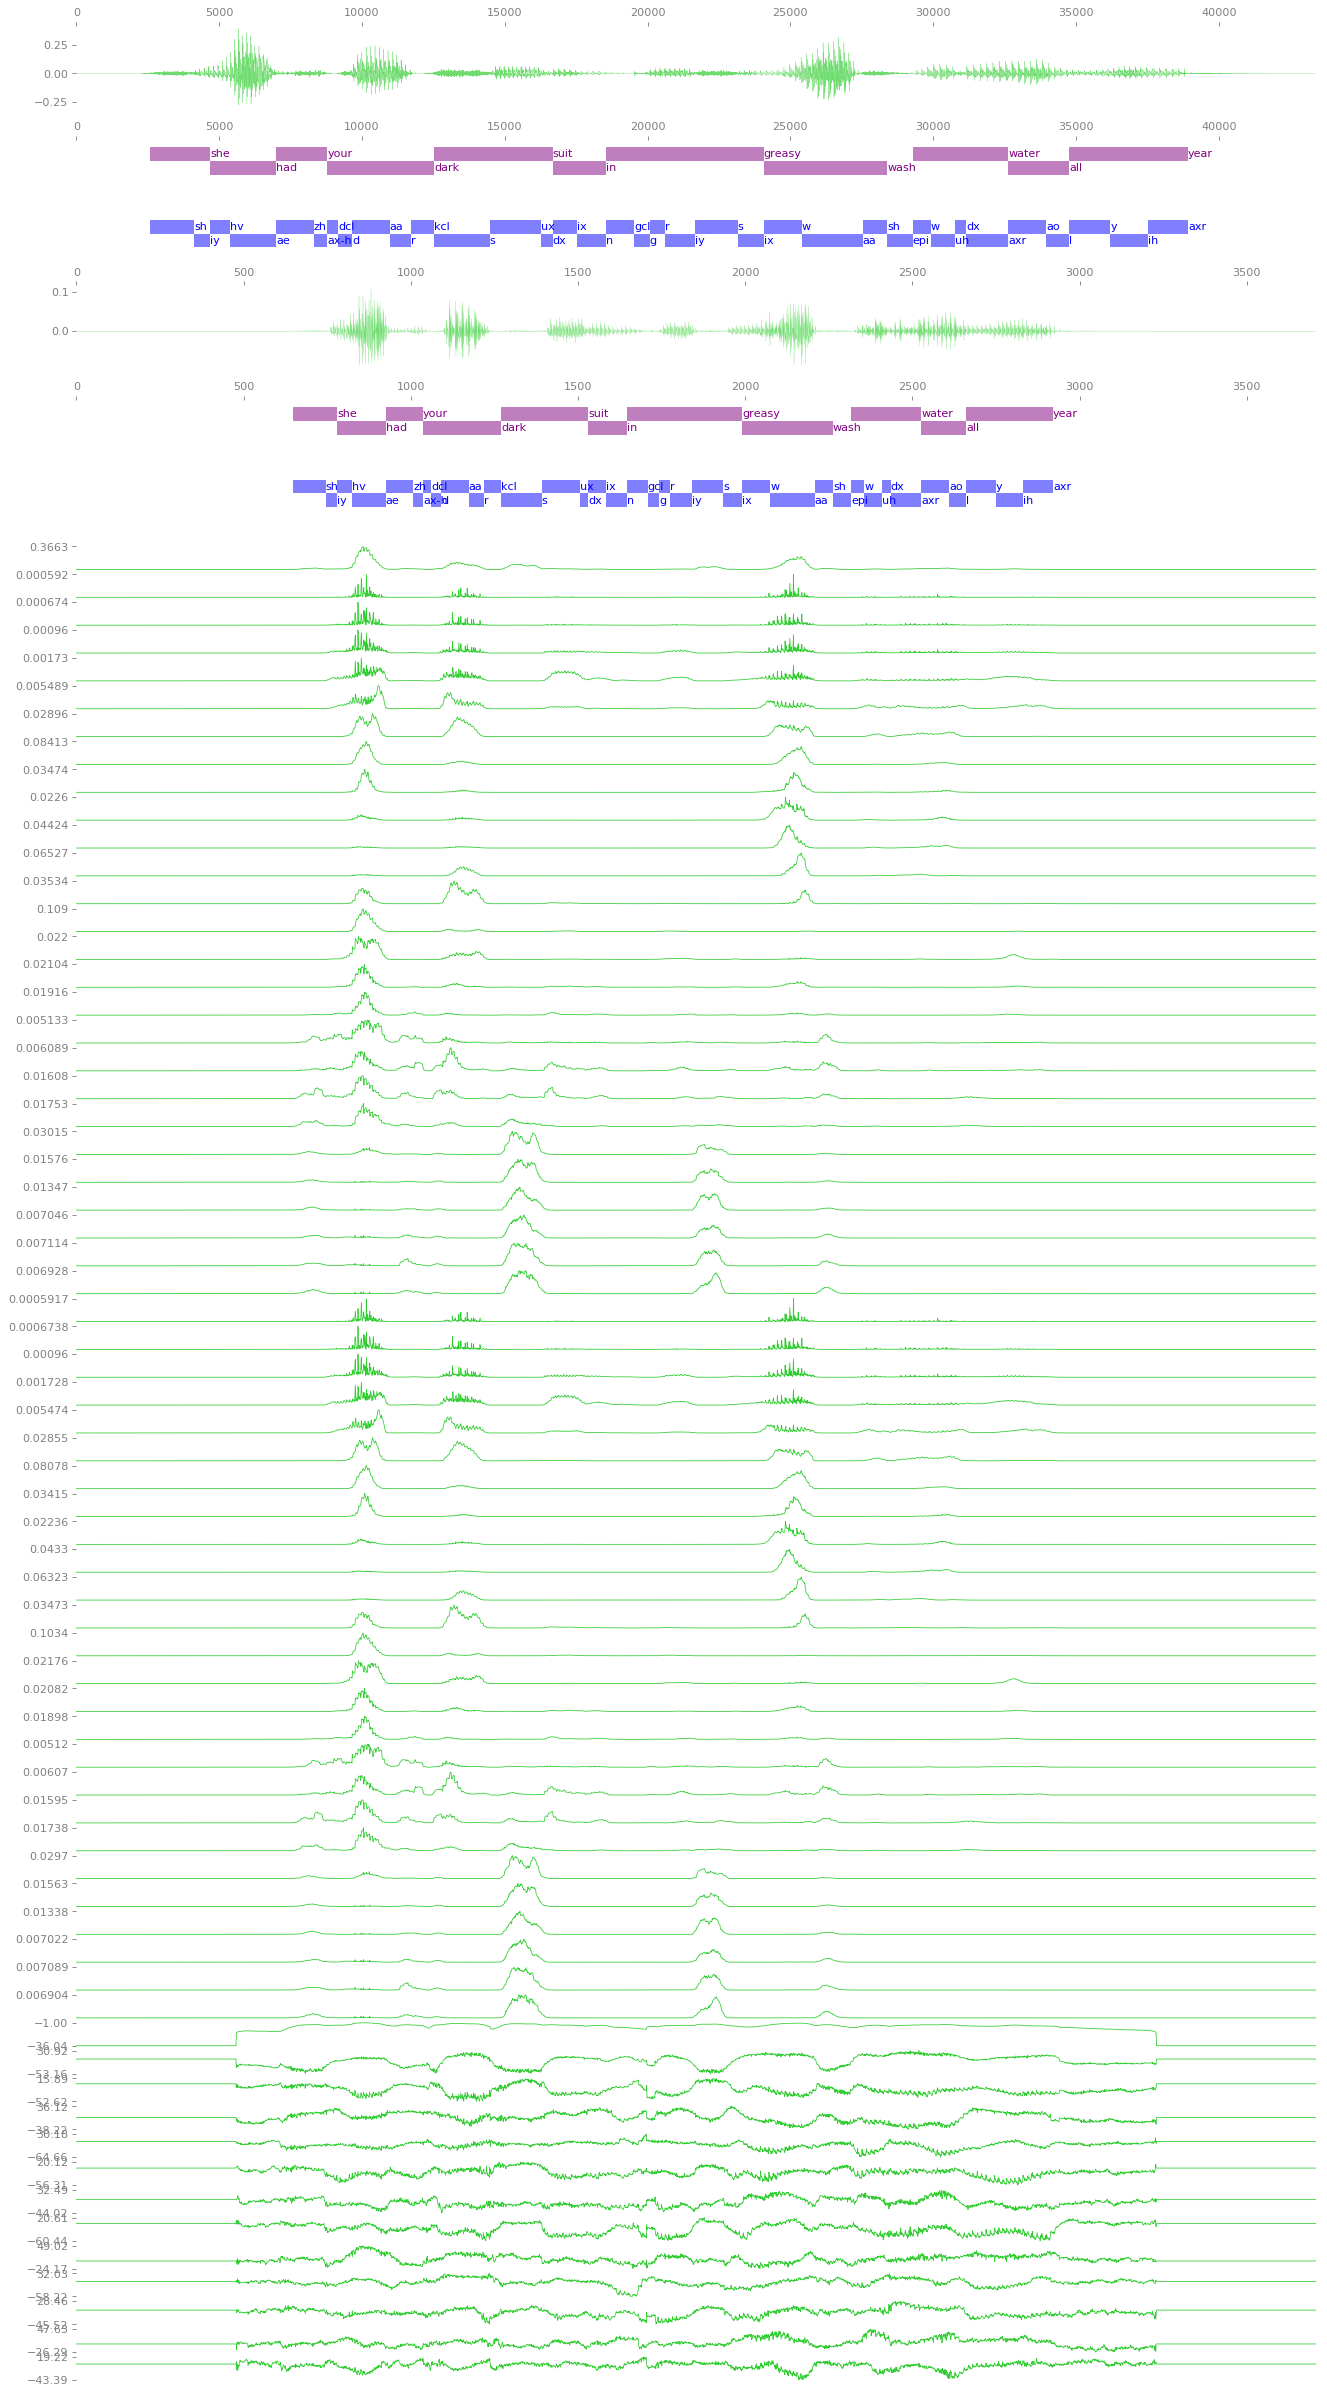

In [27]:
du.DrawVerticalPanels([du.AudioPanel(s0.raw_audio, show_x_axis=True), 
                       du.WordsPanel(s0.words_df, s0.raw_audio.shape[0], show_x_axis=True),
                       du.PhonesPanel(s0.phones_df, s0.raw_audio.shape[0]),
                       du.AudioPanel(sampled_audio, show_x_axis=True),
                       du.WordsPanel(sentence_words_input, sampled_audio.shape[0], show_x_axis=True),
                       du.PhonesPanel(sentence_phones_input, sampled_audio.shape[0]),
                       du.SignalsPanel(audio_features)
                      ])